# Treinamento com Regressão Logística

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
df = pd.read_csv('data/final/df_final.csv')

In [55]:
df.head()

,Unnamed: 0,ano,nome,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics,ganhou_os
0,2,2014,Felicity Jones,1,0,1,0,1,0,1,0,0
1,5,2014,Julianne Moore,1,1,1,1,1,1,1,1,1
2,6,2014,Julianne Moore,1,0,1,1,1,1,1,1,1
3,7,2014,Marion Cotillard,0,0,0,0,0,0,1,0,0
4,9,2014,Reese Witherspoon,1,0,1,0,1,0,1,0,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        56 non-null     int64 
 1   ano               56 non-null     int64 
 2   nome              56 non-null     object
 3   indicada_gg       56 non-null     int64 
 4   ganhou_gg         56 non-null     int64 
 5   indicada_sag      56 non-null     int64 
 6   ganhou_sag        56 non-null     int64 
 7   indicada_bafta    56 non-null     int64 
 8   ganhou_bafta      56 non-null     int64 
 9   indicada_critics  56 non-null     int64 
 10  ganhou_critics    56 non-null     int64 
 11  ganhou_os         56 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 5.4+ KB


## Dropar as linhas com 2024 antes de treinar

In [57]:
df_wo_2024 = df[df['ano'] != 2024]

## Dropar colunas que não entram no modelo

1) Colunas a serem dropadas:
- Unnamed: 0
- ano
- nome

Pegar da coluna 3 em diante

In [58]:
df_clean = df_wo_2024.iloc[:,3:]

In [59]:
df_clean.head()

,indicada_gg,ganhou_gg,indicada_sag,ganhou_sag,indicada_bafta,ganhou_bafta,indicada_critics,ganhou_critics,ganhou_os
0,1,0,1,0,1,0,1,0,0
1,1,1,1,1,1,1,1,1,1
2,1,0,1,1,1,1,1,1,1
3,0,0,0,0,0,0,1,0,0
4,1,0,1,0,1,0,1,0,0


## Analisar correlação entre as colunas

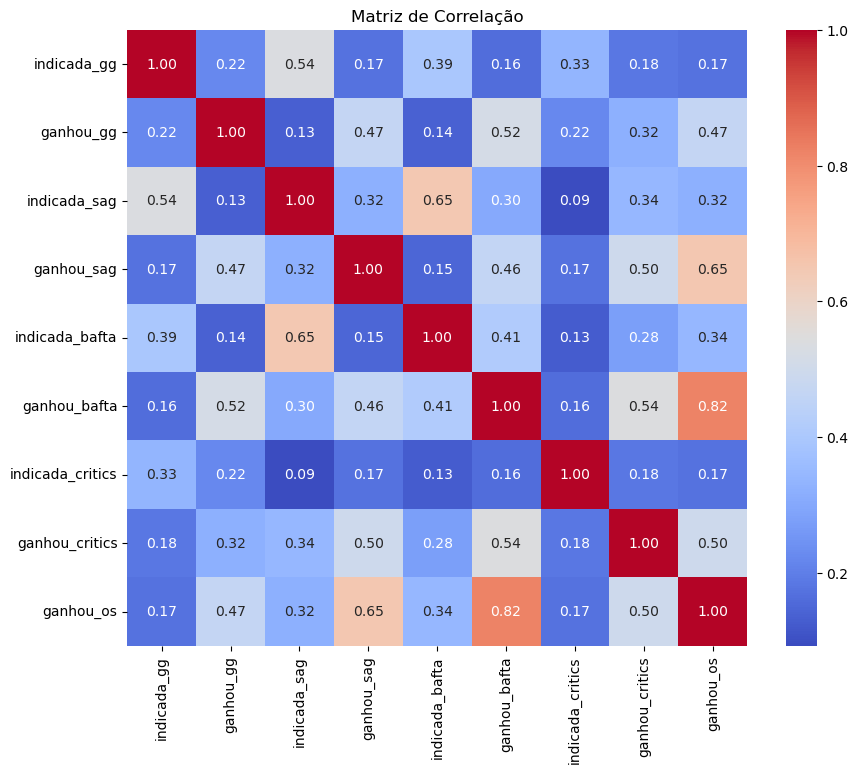

In [60]:
corr_matrix = df_clean.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

## Treinamento

In [61]:
X = df_clean.drop('ganhou_os', axis=1)
y = df_clean['ganhou_os']

In [62]:
rl = LogisticRegression(class_weight='balanced')

Avaliação com Cross-Validation

---- Avaliação com Cross-Validation ----


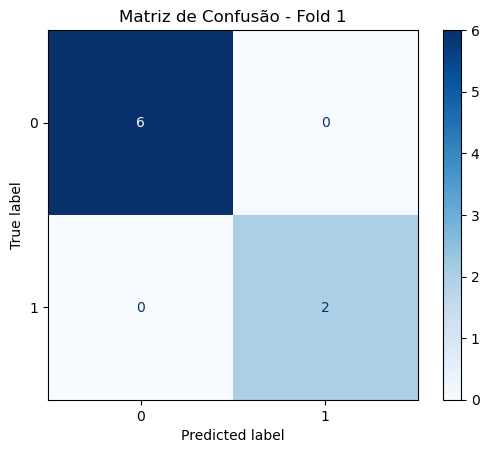

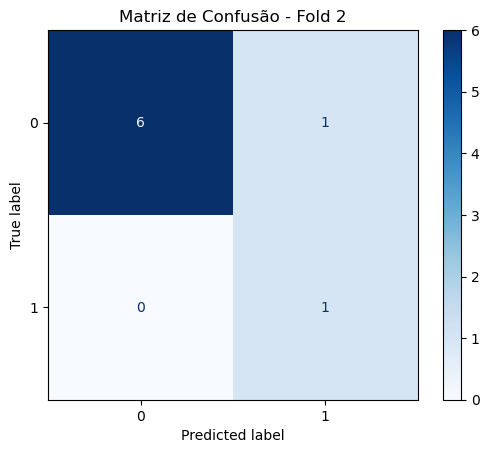

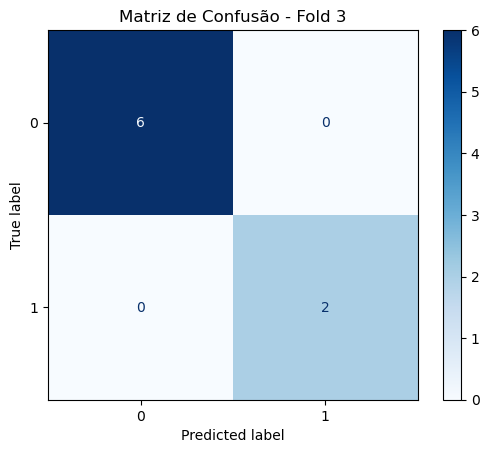

/home/adriel/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


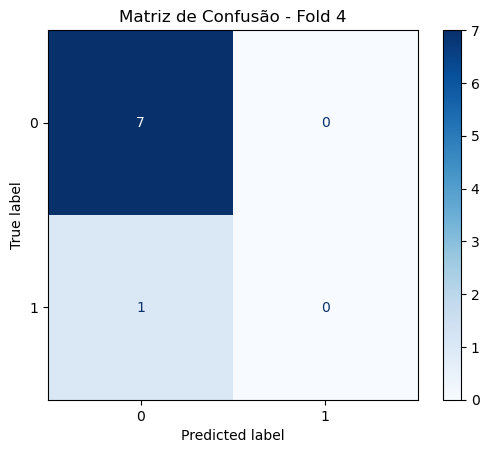

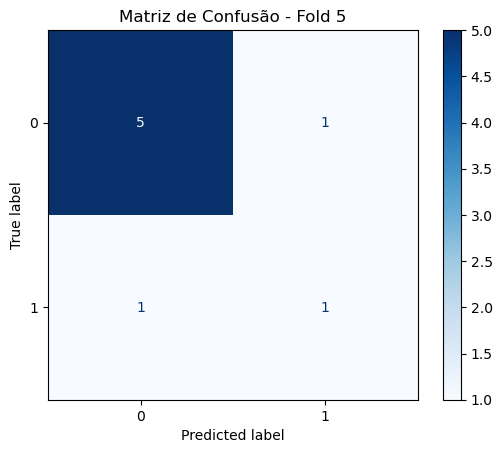


--- Métricas gerais ---
Precision média: 0.600 (+/- 0.374)
Recall média: 0.700 (+/- 0.400)
F1 média: 0.633 (+/- 0.371)
Accuracy média: 0.900 (+/- 0.094)


In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

scorers = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'accuracy': 'accuracy'
}

print("---- Avaliação com Cross-Validation ----")

precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

conf_matrices = []

# para cada fold, treinamos e avaliamos
for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    rl.fit(X_train, y_train)
    
    y_pred = rl.predict(X_test)
    
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)
    
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rl.classes_).plot(cmap='Blues')
    plt.title(f'Matriz de Confusão - Fold {fold}')
    plt.show()

print("\n--- Métricas gerais ---")
print(f"Precision média: {np.mean(precision_scores):.3f} (+/- {np.std(precision_scores):.3f})")
print(f"Recall média: {np.mean(recall_scores):.3f} (+/- {np.std(recall_scores):.3f})")
print(f"F1 média: {np.mean(f1_scores):.3f} (+/- {np.std(f1_scores):.3f})")
print(f"Accuracy média: {np.mean(accuracy_scores):.3f} (+/- {np.std(accuracy_scores):.3f})")


O que essas métricas significam em conjunto?

- **Precision de 0.600**: O modelo tem uma precisão razoável, mas poderia melhorar ao prever menos falsos positivos.

- **Recall de 0.700**: O modelo está relativamente bom em identificar os exemplos positivos, mas ainda deixa passar uma quantidade considerável de falsos negativos.

- **F1 de 0.633**: O modelo tem um equilíbrio razoável entre precisão e recall. Mas como a precisão não é muito alta (0.600), o F1 não chega a ser muito alto.

- **Accuracy de 0.900**: O modelo está acertando a maioria das previsões no geral, porém, ele acerta muito 0s (as atrizes que não ganham oscar)

Com os dados de 2024

In [64]:
X_2024 = df[df['ano'] == 2024].drop('ganhou_os', axis=1)
X_2024 = X_2024.iloc[:,3:]
previsoes_2024 = rl.predict(X_2024)
previsoes_2024

array([0, 1, 0, 0, 1])

In [65]:
df['nome'][-5:]

51         Cynthia Erivo
52            Demi Moore
53       Fernanda Torres
54    Karla Sofía Gascón
55         Mikey Madison
Name: nome, dtype: object

Avaliação sem Cross Validation


---- Avaliação Sem Cross-Validation ----
Precision: 0.500
Recall: 0.500
F1-score: 0.500
Accuracy: 0.750


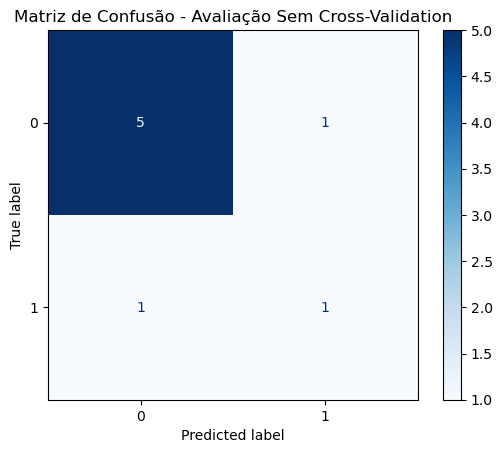

In [66]:
print("\n---- Avaliação Sem Cross-Validation ----")

tscv = TimeSeriesSplit(n_splits=5)

train_idx, test_idx = list(tscv.split(X))[-1]  # última divisão do TimeSeriesSplit

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

rl.fit(X_train, y_train)

y_pred = rl.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rl.classes_).plot(cmap='Blues')
plt.title('Matriz de Confusão - Avaliação Sem Cross-Validation')
plt.show()


Resumo do que essas métricas indicam:

- **Precision e Recall em 0.500** indicam que o modelo está cometendo uma quantidade considerável de erros em ambas as direções: ele está errando tanto em prever exemplos positivos (falsos positivos) quanto em deixar de identificar exemplos positivos (falsos negativos). Provavelmente isso acontece porque existem poucos 1s

- **O F1-score de 0.500** reflete essa média equilibrada entre precision e recall.

- **Accuracy de 0.750** sugere que o modelo está acertando a maioria das previsões no geral, mas essa métrica pode está sendo influenciada pela classe dominante (0).

Com os dados de 2024

In [67]:
X_2024 = df[df['ano'] == 2024].drop('ganhou_os', axis=1)
X_2024 = X_2024.iloc[:,3:]
previsoes_2024 = rl.predict(X_2024)
previsoes_2024

array([0, 1, 0, 0, 1])

In [68]:
df['nome'][-5:]

51         Cynthia Erivo
52            Demi Moore
53       Fernanda Torres
54    Karla Sofía Gascón
55         Mikey Madison
Name: nome, dtype: object